<a href="https://colab.research.google.com/github/PhoenixStormJr/RVC-v2-easy-GUI-glitches-fixed/blob/main/EasyGUI_Inference_Only_%F0%9F%8E%AE_10_02_2024__12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[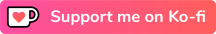](https://ko-fi.com/rejekts)

Link to original: https://colab.research.google.com/drive/1qfz5u2xBLyZp7vqzOAKZ3aJFjXZfHTuB

(optionally) polish up an RVC dataset with this colab notebook (Ultimate Vocal Remover FORK): https://colab.research.google.com/github/PhoenixStormJr/RVC-v2-easy-GUI-glitches-fixed/blob/main/UVR5_NO_UI_Prepare_RVC_dataset.ipynb

In [ ]:
#@title  **Install RVC** and **Download Model** (3 minutes)

%cd /content
from IPython.display import clear_output
from ipywidgets import Button
import subprocess, shlex, os, shutil
from google.colab import drive
import time


install_faster_by_installing_from_huggingface = True #@param{type:"boolean"}
url = "https://huggingface.co/PhoenixStormJr/Megaman-NT-Warrior-Lan_s-Mother-Hakura-RVC/resolve/main/Hakura.zip?download=true" #@param {type:"string"}
dirname = ""#@param {type:"string"}


before_installation = time.time()
#This is the new requirements file:
#Changed:
#matplotlib==3.9.4
RequirementsText="""joblib>=1.1.0
numba==0.56.4
numpy==1.23.5
scipy
librosa==0.9.1
llvmlite==0.39.0
fairseq>=0.12.2
soundfile>=0.12.1
ffmpeg-python>=0.2.0
matplotlib==3.9.4
matplotlib-inline>=0.1.3
praat-parselmouth>=0.4.2
Pillow>=9.1.1
resampy>=0.4.2
scikit-learn
tensorboard==2.19.0
tqdm>=4.63.1
sympy==1.13.1
tabulate>=0.8.10
PyYAML>=6.0
absl-py>=1.2.0
audioread
colorama>=0.4.5
pyworld==0.3.2
av
torch==2.5.0
python-dotenv
faiss-cpu==1.7.3
torchcrepe==0.0.20"""



def accellerator():
  returnValue = ""
  if len(os.environ["COLAB_GPU"]) > 0:
    returnValue = "GPU"
  elif "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
    returnValue = "TPU"
  else:
    returnValue = "CPU"
  return returnValue


#Edited this function:
def download_from_url(url=None, model=None):
    if not url:
        try:
            url = model[f'{model}']
        except:
            print("WARNING: Failed")
            return ''
    if model == '':
        try:
            model = url.split('/')[-1].split('?')[0]
        except:
            print('WARNING: Please name the model')
            return
    model = model.replace('.pth', '').replace('.index', '').replace('.zip', '')
    url = url.replace('/blob/main/', '/resolve/main/').strip()

    for directory in ["downloads", "unzips","zip"]:
        #shutil.rmtree(directory, ignore_errors=True)
        os.makedirs(directory, exist_ok=True)

    try:
        if '.pth' in url:
            subprocess.run(["wget", url, "-O", f'assets/weights/{model}.pth'])
        elif '.index' in url:
            os.makedirs(f'logs/{model}', exist_ok=True)
            subprocess.run(["wget", url, "-O", f'logs/{model}/added_{model}.index'])
        elif '.zip' in url:
            subprocess.run(["wget", url, "-O", f'downloads/{model}.zip'])
        else:
            if "drive.google.com" in url:
                url = url.split('/')[0]
                subprocess.run(["gdown", url, "--fuzzy", "-O", f'downloads/{model}'])
            elif "mega.nz" in url:
                Mega().download_url(url, 'downloads')
            else:
                subprocess.run(["wget", url, "-O", f'downloads/{model}'])

        downloaded_file = next((f for f in os.listdir("downloads")), None)
        if downloaded_file:
            if downloaded_file.endswith(".zip"):
                shutil.unpack_archive(f'downloads/{downloaded_file}', "unzips", 'zip')
                for root, _, files in os.walk('unzips'):
                    for file in files:
                        file_path = os.path.join(root, file)
                        if file.endswith(".index"):
                            os.makedirs(f'logs/{model}', exist_ok=True)
                            shutil.copy2(file_path, f'logs/{model}')
                        elif file.endswith(".pth") and "G_" not in file and "D_" not in file:
                            shutil.copy(file_path, f'assets/weights/{model}.pth')
            elif downloaded_file.endswith(".pth"):
                shutil.copy(f'downloads/{downloaded_file}', f'assets/weights/{model}.pth')
            elif downloaded_file.endswith(".index"):
                os.makedirs(f'logs/{model}', exist_ok=True)
                shutil.copy(f'downloads/{downloaded_file}', f'logs/{model}/added_{model}.index')
            else:
                gr.Warning("Failed to download file")
                return 'Failed'

        print("INFO: Done")
    except Exception as e:
        print(f"ERROR: There's been an error: {str(e)}")
    finally:
        shutil.rmtree("downloads", ignore_errors=True)
        shutil.rmtree("unzips", ignore_errors=True)
        shutil.rmtree("zip", ignore_errors=True)
        return 'Done'




if ((not "installed" in locals()) and (not "installed" in globals())) and (not os.path.exists('/content/installed.txt')):
    var = "We"+"bU"+"I"
    test = "Voice"
    c_word = "Conversion"
    r_word = "Retrieval"
    partial_name = "till"
    !git clone https://github.com/RVC-Project/{r_word}-based-{test}-{c_word}-{var} /content/RVC

    a="htt"
    b="ps:/"
    c="/huggin"
    d="gface.c"
    e="o/l"
    f="j199"
    g="5/Voi"
    h="ceConv"
    i="ersion"
    j="Web"
    k="UI"
    l="/res"
    m="olve/m"
    n="ain/p"
    o="retra"
    p="ined_"
    q="v2/f0"
    web = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q
    r="D32k.pth"
    web1 = web + r
    r = "G32k.pth"
    web2 = web + r
    a = "htt"
    b = "ps:/"
    c = "/hugg"
    d = "ingfac"
    e = "e.co"
    f = "/poiq"
    g = "azws"
    h = "x/Ov2"
    i = "Sup"
    j = "er32"
    k = "kfix/"
    l = "resol"
    m = "ve/ma"
    n = "in/f0O"
    o = "v2Sup"
    p = "er32k"
    web = a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p
    r = "D.pth"
    web3 = web + r
    r = "G.pth"
    web4 = web + r


    !mkdir -p /content/RVC/audios
    !wget -nc {web1} -O /content/RVC/assets/pretrained_v2/f0D32k.pth
    !wget -nc {web2} -O /content/RVC/assets/pretrained_v2/f0G32k.pth
    !wget -nc {web3} -O /content/RVC/assets/pretrained_v2/f0Ov2Super32kD.pth
    !wget -nc {web4} -O /content/RVC/assets/pretrained_v2/f0Ov2Super32kG.pth
    !wget -nc https://raw.githubusercontent.com/RejektsAI/EasyTools/main/original -O /content/RVC/original.py
    !wget -nc https://raw.githubusercontent.com/luisesan{partial_name}an/project/refs/heads/main/demo.py -O /content/RVC/demo.py
    !wget -nc https://huggingface.co/PhoenixStormJr/RVC-Easy-GUI-BACKUP-ONLY/resolve/main/easyfuncs.py -O /content/RVC/easyfuncs.py
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/download_files.py -O /content/RVC/download_files.py
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/a.png -O /content/RVC/a.png
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/easy_sync.py -O /content/RVC/easy_sync.py
    !wget -nc https://huggingface.co/spaces/Rejekts/RVC_PlayGround/raw/main/app.py -O /content/RVC/playground.py
    !wget -nc https://huggingface.co/spaces/Rejekts/RVC_PlayGround/raw/main/tools/useftools.py -O /content/RVC/tools/useftools.py
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/astronauts.mp3 -O /content/RVC/audios/astronauts.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/somegirl.mp3 -O /content/RVC/audios/somegirl.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/someguy.mp3 -O /content/RVC/audios/someguy.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/unchico.mp3 -O /content/RVC/audios/unchico.mp3
    !wget -nc https://huggingface.co/Rejekts/project/resolve/main/unachica.mp3 -O /content/RVC/audios/unachica.mp3
    !cd /content/RVC && python3.10 /content/RVC/download_files.py
    if accellerator() == "CPU":
      !rm -rf /content/RVC/infer/modules/vc/modules.py
      !wget -nc https://huggingface.co/PhoenixStormJr/RVC-Easy-GUI-BACKUP-ONLY/resolve/main/modules-cpu.py -O /content/RVC/infer/modules/vc/modules.py
    !rm -rf /content/RVC/infer/lib/train/data_utils.py
    !wget -nc https://huggingface.co/PhoenixStormJr/RVC-Easy-GUI-BACKUP-ONLY/resolve/main/data_utils.py -O /content/RVC/infer/lib/train/data_utils.py
    %cd /content/RVC
    if install_faster_by_installing_from_huggingface:
      print()
      print()
      print()
      print("downloading pips from huggingface")
      !wget -nc https://huggingface.co/PhoenixStormJr/RVC-Easy-GUI-faster-install/resolve/main/RVC-Easy-GUI-dist-packages.zip -O /content/dist-packages.zip
      print("removing numpy")
      for item in os.listdir("/usr/local/lib/python3.11/dist-packages/"):
        if "numpy" in item.lower():
          item_path = os.path.join("/usr/local/lib/python3.11/dist-packages/", item)
          print(f"Removing: {item_path}")
          !rm -rf {item_path}
      print("unzipping pips")
      !unzip -q -o /content/dist-packages.zip -d /usr
      print()
      print()
    else:
      #Use python 3.10 to fix this error. This sucks I know...
      #Solves error with numba:
      #Collecting numba==0.56.4 (from -r requirements.txt (line 3))
      #  Downloading numba-0.56.4.tar.gz (2.4 MB)
      #     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.6 MB/s eta 0:00:00
      #  error: subprocess-exited-with-error
      #
      #  × python setup.py egg_info did not run successfully.
      #  │ exit code: 1
      #  ╰─> See above for output.
      #
      #  note: This error originates from a subprocess, and is likely not a problem with pip.
      #  Preparing metadata (setup.py) ... error
      #error: metadata-generation-failed
      #
      #× Encountered error while generating package metadata.
      #╰─> See above for output.
      #
      #note: This is an issue with the package mentioned above, not pip.
      !curl -O https://bootstrap.pypa.io/get-pip.py
      !python3.10 get-pip.py
      !python3.10 -m pip install --upgrade pip==24.0
      RequirementsFile = open("/content/RVC/requirements.txt", "w")
      RequirementsFile.write(RequirementsText)
      RequirementsFile.close()
      #NOTE: python is DIFFERENT from python3.10! BOTH of these lines are REQUIRED!!!
      !python3.10 -m pip install -r requirements.txt
      !python -m pip install faiss-cpu==1.7.3 numpy==1.26.4 pydub
    global installed
    installed=True
    open("/content/installed.txt", "w").write("True")
    #Needed log of what happens if you remove each one:
    #
    #Can't restart without this:
    #numpy==1.26.4
    #
    #Imported to the runtime:
    #faiss-cpu==1.7.3
    #
    #Imported to the runtime:
    #pydub
    #
    #Imported in the python file:
    #torch==2.5.0
    #
    #Imported in the python file:
    #av (Current working version: av-14.4.0. But IF this ever causes problems, make sure to install the NEWEST WORKING VERSION!)
    #
    #No such file or directory: '/content/RVC/logs/MrMatch/2a_f0' also imported in the python file:
    #pyworld==0.3.2
    #
    #Apparently a dependency of a dependency of a dependency. I have no idea.
    #But it said "import not found" so it's necessary... I think?:
    #colorama>=0.4.5
    #
    #File not found error if removed (No clue what it does):
    #audioread
    #
    #Imported to the python file:
    #absl-py>=1.2.0
    #
    #Imported to the python file:
    #PyYAML>=6.0
    #
    #Imported to the python file:
    #tabulate
    #
    #Imported to the python file:
    #sympy>=1.11.1
    #
    #Imported to the python file:
    #tqdm>=4.63.1
    #
    #Imported to the python file:
    #tensorboard
    #
    #Unknown file not found error:
    #scikit-learn
    #
    #Unknown file not found error:
    #resampy>=0.4.2
    #
    #Import of an import:
    #Pillow>=9.1.1
    #
    #Imported to the python file:
    #praat-parselmouth>=0.4.2
    #
    #ValueError: Key backend:
    #matplotlib-inline>=0.1.3
    #
    #Imported to the python file:
    #matplotlib==3.9.4
    #
    #imported to the python file:
    #ffmpeg-python>=0.2.0
    #
    #File not found error:
    #soundfile>=0.12.1
    #
    #Imported to the python file:
    #fairseq==0.12.2
    #
    #File not found error:
    #llvmlite==0.39.0
    #
    #File not found error:
    #librosa==0.9.1
    #
    #File not found error:
    #scipy
    #
    #Imported to the python file:
    #numpy==1.23.5
    #
    #File not found error:
    #numba==0.56.4
    #
    #File not found error:
    #joblib>=1.1.0
    #
    #
    #
    #REMOVED with seemingly no issue on test:
    #"audio-separator[gpu]"
    #audiosr
    #webdataset
    #pytube
    #gdown
    #mega.py
    #python-dotenv>=1.0.0
    #ffmpy==0.3.1 (I could've sworn this wouldve done something. It didn't.)
    #torchfcpe (Something about lip syncing.)
    #fastapi==0.88 (The web interface, but no need for a minimalist install)
    #torchcrepe==0.0.20 (pitch extraction. Should've been necessary but wasn't after all.)
    #onnxruntime-gpu; sys_platform != 'darwin' (Honestly? No clue what it does. I deleted it and nothing broke.)
    #httpx (downloading, but I tested and the download worked fine.
    #uvicorn (probably web application again)
    #fsspec (No clue at all.)
    #pyasn1-modules (CRYPTOGRAPHY!? WHY IS THIS HERE!?)
    #pyasn1 (Legit no clue whatsoever what this is.)
    #uc-micro-py (Something about unicode characters)
    #Werkzeug>=2.2.3 (Web interface or something.)
    #tornado (Web servers or something.)
    #Markdown (Something converting Markdown text to HTML.)
    #json5 (Uh... json files?)
    #Jinja2>=3.1.2 (web pages, some templates or pretty graphs.)
    #tensorboardX (some graphics and graphs tool for losses.)
    #pydub>=0.25.1 (This DIRECTLY does audio, but I guess it wasn't needed after all.)
    #Cython (C files. Yes. Original C programming.)
    #gradio==3.34.0 (Web interface)
    #faiss-cpu==1.7.3 (No idea what this did. Supposed to speed up vector searches, whatever that is.)
    #aria2 (Some downloader)

%cd /content/RVC
print()
print()
print("Downloading model:")
print(url)
download_from_url(url, dirname)
print()
print("Downloaded model!")
print()
if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
  print("Intalled and restarted. You are ready to start voice cloning!")

if(("installed" in locals()) and ("installed" in globals()) and (os.path.exists('/content/installed.txt'))):
  print("\n\n\n\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\".\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\".\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\".\nPlease RESTART the runtime. At the top of your screen, click \"Runtime\" -> \"Restart session\".")


after_installation = time.time()
elapsed_time = after_installation - before_installation
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
print()
print(f"Time taken to install: {minutes} minutes and {seconds} seconds")


Button(description="\u2714 Success", button_style="success")

In [ ]:
#@title 🔊 **Inference**

#@markdown Put the model name here to automatically detect the model_path, and the index_path:
model_name = "Hakura" #@param {type:"string"}

#@markdown Or manually put the model_path and index_path here:
model_path = ""#@param {type:"string"}
index_path = ""#@param {type:"string"}

#@markdown Put the path to your audio file you want converted here:
#@markdown
#@markdown (If left blank, it will ask you to upload or record a file. If file does not exist it will also ask you to upload or record a file):
input_path = "/content/RVC/audios/myrecordingHakura.wav"#@param {type:"string"}

#@markdown On the chance that this file above does not exist, how would you like to create it?:
create_audio_method = "upload_file" # @param ["upload_file", "record_audio"]

#@markdown (And the rest of the settings are self explanatory.):
pitch = 6 # @param {type:"integer"}
f0_method = "rmvpe" # @param ["rmvpe", "pm", "harvest"]
index_rate = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}
volume_normalization = 0 # @param {type:"slider", min:0, max:1, step:0.01}
consonant_protection = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}



import os


if not ("Linked_To_Google_Drive" in globals() or "Linked_To_Google_Drive" in locals()):
    if(os.path.exists('/content/drive/MyDrive')):
        from RVC.easy_sync import Channel
        logs_folder ='/content/drive/MyDrive/project-main/logs'
        weights_folder = '/content/drive/MyDrive/project-main/assets/weights'
        if not "logs_backup" in locals(): logs_backup = Channel('/content/RVC/logs',logs_folder,every=30,exclude="mute")
        if not "weights_backup" in locals(): weights_backup = Channel('/content/RVC/assets/weights',weights_folder,every=30)
        if os.path.exists('/content/drive/MyDrive'):
            if not os.path.exists(logs_folder): os.makedirs(logs_folder)
            if not os.path.exists(weights_folder): os.makedirs(weights_folder)
            logs_backup.start()
            weights_backup.start()
        global Linked_To_Google_Drive
        Linked_To_Google_Drive = True


#All of these are functions I made or stole from other programmers. They are not
#the main code to transfer one voice to another.
#######################################################################################################
#######################################################################################################
#######################################################################################################
#######################################################################################################
#######################################################################################################
x="""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O (funny that I pirated the pirate's code. LOL.)
https://colab.research.google.com/gist/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd/microphone-to-numpy-array-from-your-browser-in-colab.ipynb#scrollTo=OIMPC3xuQMAO
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");
my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);
var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;
var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);
    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };
recordButton.innerText = "Recording... press to stop";
navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);
function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}
// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}
var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()
sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())
});
}
});

</script>
"""
def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)
  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]
  sr, audio = wav_read(io.BytesIO(riff))
  return audio, sr

def Record_To_File(filename='/content/RVC/Vocales/audio.wav'):
  print("WARNING: Due to a glitch in Google Colab, you may need to restart this cell, or run it twice to actually record audio.")
  x = input("Press \"Enter\" on your keyboard to start recording audio: ")
  audio, sr = get_audio()
  filedirectories = filename.split('/')
  filepath = ""
  x = 0
  while x < len(filedirectories) -1:
    filepath = filepath + filedirectories[x] + "/"
    x = x + 1
  if(not os.path.exists(filepath)):
    os.makedirs(filepath)
  if(os.path.exists(f"{filename}")):
    x = 1
    while(os.path.exists(f"{filename.replace('.',f'_{x}.')}")):
      x = x + 1
    filename = filename.replace(".",f"_{x}.")
  write(filename, sr, audio)
  return filename

def my_os_walk(path):
  returnList = []
  original_walk = list(os.walk(path))
  for x1 in original_walk:
    x2 = 1
    while(x2 < len(x1)):
      for x3 in x1[x2]:
        returnList.append(f"{x1[0]}/{x3}")
      x2 = x2 + 1
  return returnList

def get_model_path(model_name):
  model_locations = ['/content/drive/MyDrive/RVC/assets/weights','/content/RVC/assets/weights']
  for location in model_locations:
    possible_models = my_os_walk(location)
    for possible_model in possible_models:
      if(possible_model.split('/')[-1] == f"{model_name}.pth"):
        return possible_model
  return ""

def get_index_path(model_name):
  index_locations = ['/content/drive/MyDrive/RVC/logs','/content/RVC/logs']
  for location in index_locations:
    possible_indexes = my_os_walk(location)
    for possible_index in possible_indexes:
      if model_name in possible_index and ".index" in possible_index and "added" in possible_index:
        return possible_index
  return ""

def get_models_list():
  model_locations = ['/content/drive/MyDrive/RVC/assets/weights','/content/RVC/assets/weights']
  for model_location in model_locations:
    if os.path.exists(model_location):
      possible_models = os.listdir(model_location)
      if len(possible_models) > 0:
        possible_models2 = []
        for possible_model in possible_models:
          if ".pth" in possible_model:
            possible_models2.append(possible_model.replace(".pth",""))
        return possible_models2
  return []

def upload_file_to(upload_directory):
  present_working_directory = !pwd
  present_working_directory = present_working_directory[0]
  if not os.path.exists(upload_directory):
    os.makedirs(upload_directory)
  %cd {upload_directory}
  uploaded = files.upload()
  uploaded2 = list(uploaded.keys())[0]
  uploaded3 = uploaded2.replace("(","_").replace(")","_").replace(" ","_")
  if uploaded2 != uploaded3:
    shutil.copy(uploaded2, uploaded3)
  %cd {present_working_directory}
  print(f"Uploaded file: \"{uploaded3}\"")
  UploadPath = f"{upload_directory}{os.sep}{uploaded3}"
  return UploadPath

def upload_specific_file_to(upload_file):
  present_working_directory = !pwd
  present_working_directory = present_working_directory[0]
  MyList = upload_file.split("/")
  upload_directory = ""
  x1 = 0
  while x1 < len(MyList) -1:
    upload_directory = upload_directory + MyList[x1] + "/"
    x1 = x1 + 1
  if not os.path.exists(upload_directory):
    os.makedirs(upload_directory)
  %cd {upload_directory}
  uploaded = files.upload()
  uploaded2 = list(uploaded.keys())[0]
  upload_file2 = ""
  MyList2 = upload_file.split(".")
  x1 = 0
  while x1 < len(MyList2) -1:
    upload_file2 = upload_file2 + MyList2[x1] + "."
    x1 = x1 + 1
  upload_file_final = f"{upload_file2}{uploaded2.split('.')[-1]}"
  os.rename(uploaded2, upload_file_final)
  %cd {present_working_directory}
  print(f"Uploaded file: \"{upload_file_final}\"")
  return upload_file_final

def accellerator():
  returnValue = ""
  if len(os.environ["COLAB_GPU"]) > 0:
    returnValue = "GPU"
  elif "COLAB_TPU_ADDR" in os.environ and os.environ["COLAB_TPU_ADDR"]:
    returnValue = "TPU"
  else:
    returnValue = "CPU"
  return returnValue

########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################



if((not "installed" in locals()) and (not "installed" in globals()) and (os.path.exists('/content/installed.txt'))):
    %cd /content/RVC
    import os
    import IPython.display as ipd
    import shutil
    from IPython.display import Audio, display
    from google.colab import files
    from IPython.display import HTML, Audio
    from google.colab.output import eval_js
    from base64 import b64decode
    import numpy as np
    from scipy.io.wavfile import read as wav_read
    import io
    from scipy.io.wavfile import write

    #This just shows you all the models you have downloaded. It's completely useless.
    print()
    print()
    print("Here are all the models that you have downloaded and can use:")
    models = get_models_list()
    for model in models:
      print(model)
    print()
    print()


    #If you left model_path and index_path blank, this will automatically detect them:
    if(model_name != ""):
      if(model_path == ""):
        print("Detecting model path...")
        model_path = get_model_path(model_name)
        print(f"model_path detected is: {model_path}")
        print()
      if(index_path == ""):
        print("Detecting index path...")
        index_path = get_index_path(model_name)
        print(f"index_path detected is: {index_path}")
        print()


    #This is the original code again:
    print(f"{index_path} was found") if os.path.exists(index_path) else print(f"{index_path} was not found")

    #This detects if input_path is blank. If it is, this will automatically ask you to upload a file:
    if(input_path == ""):
        if(create_audio_method == "upload_file"):
          input_path = upload_file_to("/content/RVC/audios")
        elif(create_audio_method == "record_audio"):
          input_path = Record_To_File()
    #This detects if the input_path exists. If it does not exist, it will automatically ask you to upload the input_path:
    elif not os.path.exists(input_path):
        if(create_audio_method == "upload_file"):
          print()
          print("WARNING: input_path does not exist. Therefore, can you upload the input audio?:")
          input_path = upload_specific_file_to(input_path)
        elif(create_audio_method == "record_audio"):
          print()
          print("WARNING: input_path does not exist. Therefore, can you record the input audio?:")
          input_path = Record_To_File(input_path)
    else:
        print(f"MESSAGE: input_path \"{input_path}\" was found")
    #The rest of this code is the exact same as the original. I have no idea what it does:
    os.environ['index_root'] = os.path.dirname(index_path)
    index_path = os.path.basename(index_path)
    save_as = f"/content/RVC/audios/cli_output.wav"
    model_name = os.path.basename(model_path)
    os.environ['weight_root'] = os.path.dirname(model_path)
    print("Converting audio file...")
    !python3.10 tools/infer_cli.py --f0up_key $pitch --input_path $input_path --index_path $index_path --f0method $f0_method --opt_path $save_as --model_name $model_name --index_rate $index_rate --device "cuda:0" --is_half True --filter_radius 3 --resample_sr 0 --rms_mix_rate $volume_normalization --protect $consonant_protection

    display(Audio(save_as, autoplay=True))
    files.download(save_as)
elif((not "installed" in locals()) and (not "installed" in globals()) and (not os.path.exists('/content/installed.txt'))):
  print("ERROR: You have not installed RVC. Please run the first cell. Yes it takes forever, but it's required.")
else:
  print("ERROR: You have installed RVC, however, you have not restarted the runtime. Please restart by clicking \"Runtime\" -> \"Restart session\".")









In [ ]:
#@title Audio Player
import IPython.display as ipd
import os


audios = "audios/someguy.mp3"#@param {type:"string"}
if os.path.isdir(audios):
    for audio in os.listdir(audios):
        if audio.startswith("."): continue
        ipd.display(ipd.Audio(os.path.join(audios,audio)))

else:
    for audio in audios.split(","):
        ipd.display(ipd.Audio(audio))